In [11]:
import folium 
import pandas as pd
import json


In [23]:
# read events

df_attended_events = pd.read_csv('..\\data_CityEvent\\Cityevents\\Demand_Intelligence_for_Attended_Events_California-0.csv')

In [10]:
display(df_attended_events['GEO'][0])
display(type(df_attended_events['GEO'][0]))

'{"coordinates":[-122.064,37.9089],"type":"Point"}'

str

In [27]:
# Define a function that safely extracts coordinates
def extract_coordinates(geo_json_str):
    try:
        geo_dict = json.loads(geo_json_str)
        coordinates = geo_dict.get('coordinates', [])
        if len(coordinates) == 2:
            return coordinates[0], coordinates[1]  # (longitude, latitude)
        else:
            return None, None  # Invalid coordinates
    except (json.JSONDecodeError, TypeError):
        return None, None  # Handle JSON parsing errors or invalid types

# Apply the function to extract longitude and latitude
# df_attended_events['longitude'], df_attended_events['latitude'] = zip(*df_attended_events['GEO'].apply(extract_coordinates))

# Now 'longitude' and 'latitude' columns are added, with None for invalid entries

In [59]:
def spatial_dist_of_events(df, events_dataframe_name='events'):
    df['longitude'], df['latitude'] = zip(*df['GEO'].apply(extract_coordinates))

    # Ensure latitude and longitude are valid numbers
    df['latitude'] = df['latitude'].apply(lambda x: x if isinstance(x, (int, float)) else None)
    df['longitude'] = df['longitude'].apply(lambda x: x if isinstance(x, (int, float)) else None)

    # Filter out rows with missing latitude or longitude
    valid_locations = df.dropna(subset=['latitude', 'longitude'])

    # Create a GeoDataFrame
    geometry = [Point(lon, lat) for lon, lat in zip(valid_locations['longitude'], valid_locations['latitude'])]
    gdf = gpd.GeoDataFrame(valid_locations, geometry=geometry)

    # Set the original CRS (WGS84 - EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Convert to Web Mercator (EPSG:3857) for compatibility with contextily basemaps
    gdf = gdf.to_crs(epsg=3857)

    # Plot the points with different colors based on the 'CATEGORY' column
    ax = gdf.plot(column='CATEGORY', cmap='Set1', legend=True, figsize=(20, 14), markersize=3)

    # Add a basemap from contextily
    ctx.add_basemap(ax, crs=gdf.crs)

    # Title
    plt.title(f"Spatial distribution of {events_dataframe_name}")

    # Save the figure before displaying it
    plt.savefig(f'..\\results\\{events_dataframe_name}.PNG', bbox_inches='tight', dpi=300)  # Save image with high resolution

    plt.show()


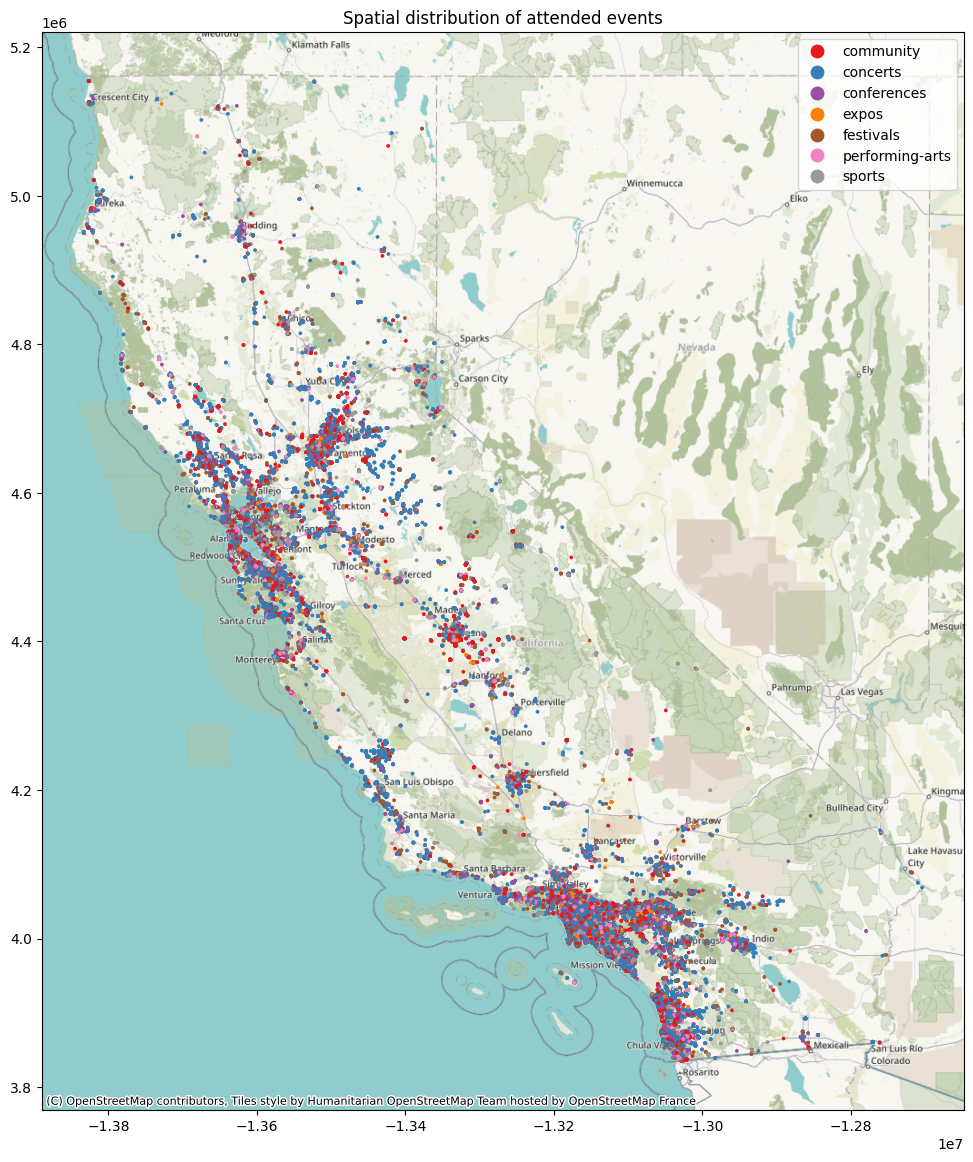

In [62]:
spatial_dist_of_events(df_attended_events, 'attended events')

In [33]:
df_non_attended_events = pd.read_csv('..\\data_CityEvent\\Cityevents\\Demand_Intelligence_for_Non_Attended_Events_California-0.csv') 

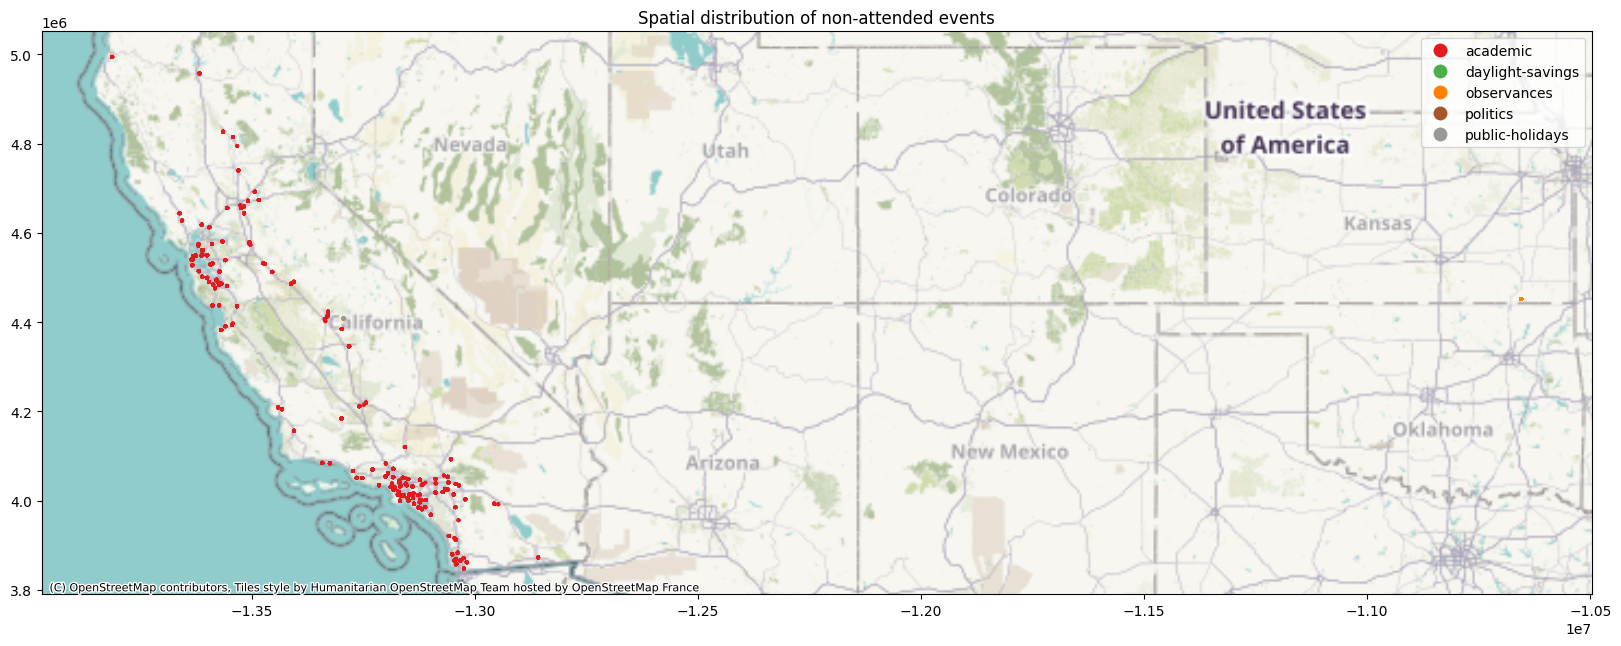

In [61]:
spatial_dist_of_events(df_non_attended_events, 'non-attended events')

In [39]:
df_unscheduled_events = pd.read_csv('..\\data_CityEvent\\Cityevents\\Demand_Intelligence_for_Unscheduled_Events_North_America-0.csv')  

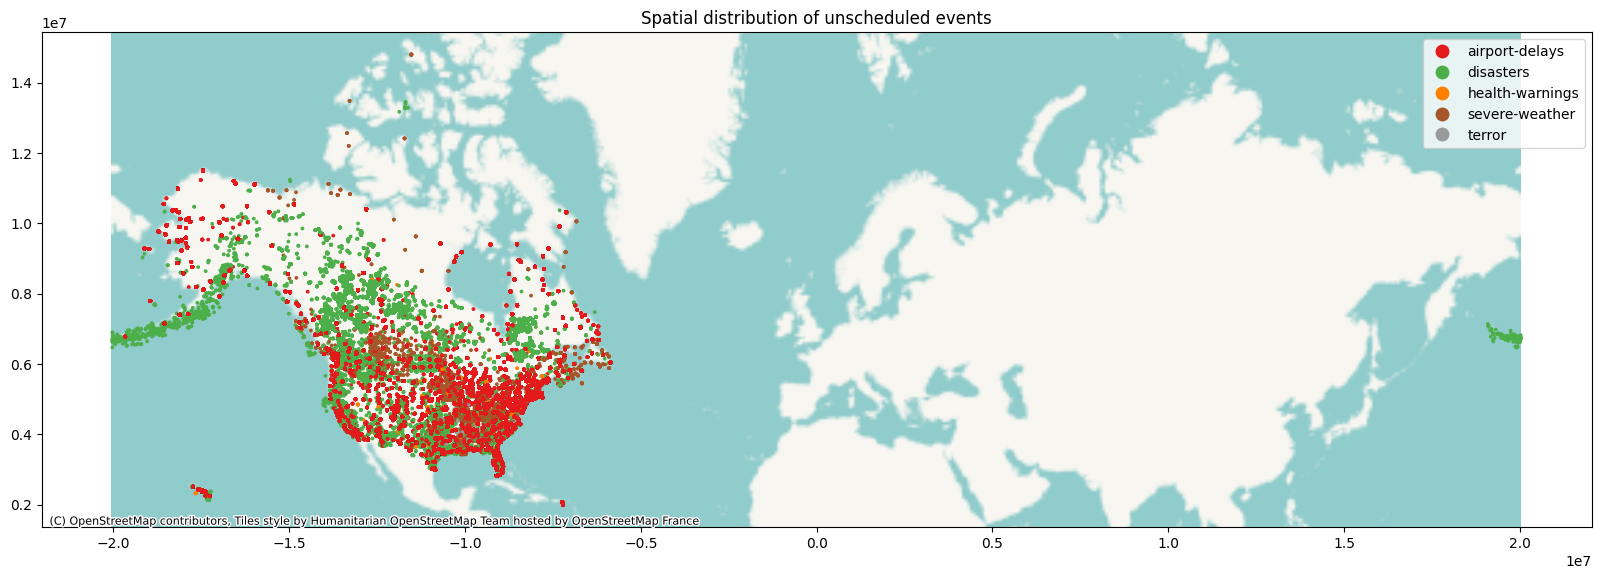

In [60]:
spatial_dist_of_events(df_unscheduled_events, 'unscheduled events')